# Python assignment 'estimate gradient’

Julianna Cisewska

Pick three vectors from the table, using letters from your names and using each column. These are the three personality types that we will use in this example. Each new person will be compared to the three personalities, in order to make social predictions.

For u1,u2, we picked the letters J/K, as it is the first letter of both our first name. 
For v1,v2, we picked the letter I, as the letter is in both of our names. 
For w1,w2, we picked the letter A, as the letter is also in both of our names. 

J/K = (59,94)
I =   (79,94)
A =   (56,20)


u1,u2= (59,94)
v1,v2= (79,94)
w1,w2= (56,20)

Define the distance between two vectors as x, u as

Dist (v,w)= log(3+ 3*(w1-v1)2+1.5*(w2-v2)2 )

Hint: Check that the distance between a vector and itself is log(3). Check that the distance between your three vectors is non-zero. With log we mean the natural logarithm (numpy.ln). 

In [16]:
import math
import numpy as np 
import random 

In [18]:
u = (59,94)
v = (79,94)
w = (56,20)

u1,u2 = (59,94)
v1,v2 = (79,94)
w1,w2 = (56,20)

u1,u2 = u
v1,v2 = v
w1,w2 = w

In [39]:
#the distance between two vectors as x, u

def dist(y, z):
    y1, y2 = y
    z1, z2 = z
    
    result= np.log(3 + 3 * (z1 - y1)**2 + 1.5 * (z2 - y2)**2)
    return result

print("The distance between the two vectors is:", dist)

The distance between the two vectors is: <function dist at 0x114ad31a0>


# 1. Define your Diff function in python.

Define the overall difference function for a new input x as the following. In this formula, u,v,w are fixed values unique to your group:

    Diff(x) = Dist(u,x)+Dist(v,x)+Dist(w,x).

In [20]:
#the overall difference function for a new input x as the following

def diff(x):     
    return dist(u, x) + dist(v, x) + dist(w, x)

# 2. Compute Diff(x) for 20 random points. What is the average value of Diff? What is the lowest and highest value you found? Is random search a good way to minimize this function?

In [40]:
twenty_random_points = np.random.randint(0, 100, size=(20, 2))

# Apply the `diff` function to each random point
twenty_values = [diff(x) for x in twenty_random_points]

# Store the results in `diff_values`
diff_values = twenty_values

# Find the minimum, maximum, and mean of the diff values
minimum_of_points = np.min(diff_values)
maximum_of_points = np.max(diff_values)
mean_of_points = np.mean(diff_values)

# Print the results
print("The average value of Diff is:", mean_of_points) 
print("The lowest value found is:", minimum_of_points) 
print("The highest value found is:", maximum_of_points)


The average value of Diff is: 25.3993551115798
The lowest value found is: 20.143538939060804
The highest value found is: 28.54854474188471


Random Search can outperform more systematic approaches in high-dimensional areas. However, because random search is based on randomness, you have to run the code several times to obtain the ideal collection of hyperparameters. As a result, random search is not an effective method for minimizing this function because there are several alternative possibilities inside it.

# 3. Set xzero=(50,50). Compute Diff(x)=Diff(50,50).

In [41]:
x_zero = [50,50] 
difference_x_zero = diff(x_zero)

print("The result is:", difference_x_zero)

The result is: 23.941728556498358


# 4. Create a function to compute and print the gradient of Diff by using a small delta = 0.001.

In [43]:
def func_gradient(x, delta):
    
    gradient = []
    delta = 0.001
    
    for i in range(len(x)):
        x_min = x.copy()
        x_min[i] -= delta
        x_addition = x.copy()
        x_addition[i] += delta
        first_part_of_derivative = (diff(x_addition) - diff(x_min))
        second_part_of_derivative = (2 * delta)
        
        derivative = first_part_of_derivative / second_part_of_derivative
        gradient.append(derivative)
    result = np.array(gradient)
    return result

# 5. Use this function to print the gradient at (0,0), (100,0), (0,100) and (100,100). Based on these values, is it likely that the minimum of the function is inside this area? And the maximum?

In [45]:
 delta = 0.001
list = [0,0], [100,0], [0,100], [100,100]

first = list[0]
second = list[1]
third = list[2]
fourth = list[3]

gradient0 = func_gradient(first, delta)
gradient1 = func_gradient(second, delta)
gradient2 = func_gradient(third, delta)
gradient3 = func_gradient(fourth, delta)

print("The Gradient of Diff at x0 =", first, "is", gradient0)
print("The Gradient of Diff at x0 =", second, "is", gradient1)
print("The Gradient of Diff at x0 =", third, "is", gradient2)
print("The Gradient of Diff at x0 =", fourth, "is", gradient3)

The Gradient of Diff at x0 = [0, 0] is [-0.06332155 -0.02671015]
The Gradient of Diff at x0 = [100, 0] is [ 0.06326382 -0.04411031]
The Gradient of Diff at x0 = [0, 100] is [-0.07662788  0.01529702]
The Gradient of Diff at x0 = [100, 100] is [0.15667026 0.03214618]


EXPLAIN: It is  likely that the minimum of the function is inside this area and the maximum aswell. This can be explained, since the maximum will be most likely be around [100,100], since the gradient is positive. .... not sure how to further explain.

# 6. Define xzero=(50,50) and stepsize=1.0. Make a function to compute xnext by taking e a small step into the opposite direction of the gradient, so that diff decreases. E.g. if the gradient is (0.4,0.6), do xnext=(oldx1-0.4*stepsize,oldx2-0.6*stepsize)

In [38]:
def compute_xnext(x, stepsize=1.0, delta=0.001):
    gradient = func_gradient(x, delta)
    
    # Compute the next point by moving in the opposite direction of the gradient
    xnext = np.array(x) - stepsize * gradient
    
    return xnext

# Set the initial point and step size
x_zero = [50, 50]
stepsize = 1.0

# Compute the next point after moving in the opposite direction of the gradient
xnext = compute_xnext(x_zero, stepsize)

# Print the new point
print("The next point xnext after taking a step is:", xnext)

The next point xnext after taking a step is: [50.07382771 50.00461251]


In [46]:
# Points where we want to compute the gradient
points = [[0, 0], [100, 0], [0, 100], [100, 100]]

# Compute gradients for each point
for point in points:
    gradient = func_gradient(point, delta=0.001)
    print(f"The Gradient of Diff at x = {point} is {gradient}")


The Gradient of Diff at x = [0, 0] is [-0.06332155 -0.02671015]
The Gradient of Diff at x = [100, 0] is [ 0.06326382 -0.04411031]
The Gradient of Diff at x = [0, 100] is [-0.07662788  0.01529702]
The Gradient of Diff at x = [100, 100] is [0.15667026 0.03214618]


# 7. Repeat this multiple times (make a function to do this automatically) and print x and Diff(x) at each step. You may need to adjust stepsize if you overshoot or are not moving at all. Try to reach a local minimum. In your report, explain how many steps (dozens, hundreds, thousands, millions) are needed to reach a final solution and what you did to minimise this number of steps.

# 8. Repeat step 7 with starting points (0,0) and (100,100). Do you always end up at the same point?

# 9. Make the nicest possible chart using mathplotlib that shows what the Diff function looks like. 

In [32]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors

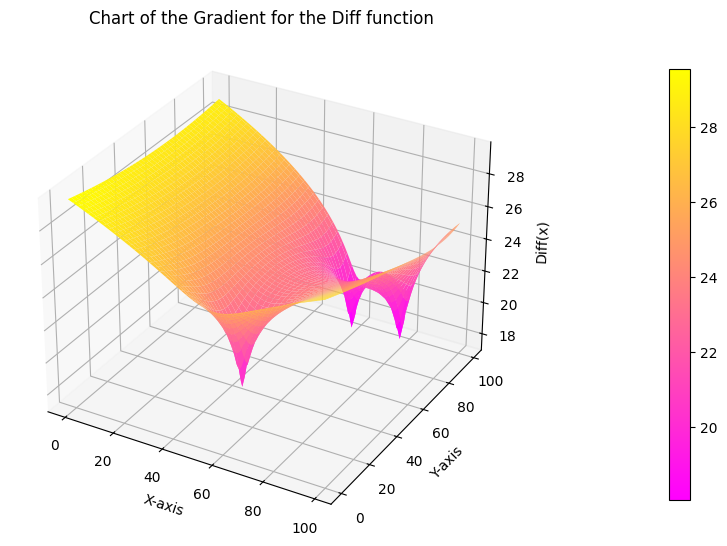

In [33]:
figure = plt.figure(figsize=(10,7)) 

ax = figure.add_subplot(111, projection= "3d")  

X = np.arange(0, 100, 1) 
Y = np.arange(0, 100, 1) 

X, Y = np.meshgrid(X, Y) 
z = np.array([X, Y]) 
Z = diff(z)  

my_cmap = plt.get_cmap("spring")
                       
surf = ax.plot_surface(X, Y, Z, cmap = my_cmap, lw = 0, antialiased = True) 

figure.colorbar(surf, shrink = 0.8, pad = 0.2)  

# Adding labels
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel('Diff(x)')
ax.set_title("Chart of the Gradient for the Diff function") 
 
# show plot
plt.show()

# 10. Show the gradient field as well in a chart. Use a new plot or add the gradient to the original plot.

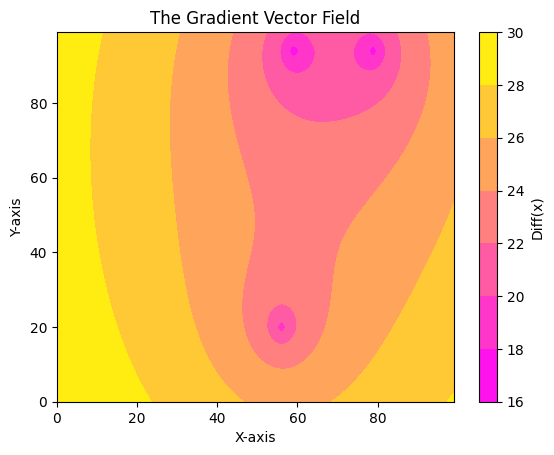

In [34]:
fig = plt.figure() 

my_cmap = plt.get_cmap("spring")

plt.contourf(X,Y,Z,cmap = my_cmap) 
plt.colorbar(label= "Diff(x)") 

plt.xlabel("X-axis") 
plt.ylabel("Y-axis") 

plt.title("The Gradient Vector Field") 
plt.show()